## No null values
## 403 duplicate values
## Naive_bayes algorithm
## Imbalanced dataset ham - 87% spam - 23%

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
234,spam,Text & meet someone sexy today. U can find a d...,NaN,NaN,NaN
997,ham,Not a lot has happened here. Feels very quiet....,NaN,NaN,NaN
3597,ham,"Aight, we'll head out in a few",NaN,NaN,NaN
3761,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,NaN,NaN,NaN
4589,ham,Tomorrow i am not going to theatre. . . So i c...,NaN,NaN,NaN


In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.replace({'target':{'ham':0,'spam':1}},inplace=True)

In [ ]:
# df.head()

In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

<Axes: >

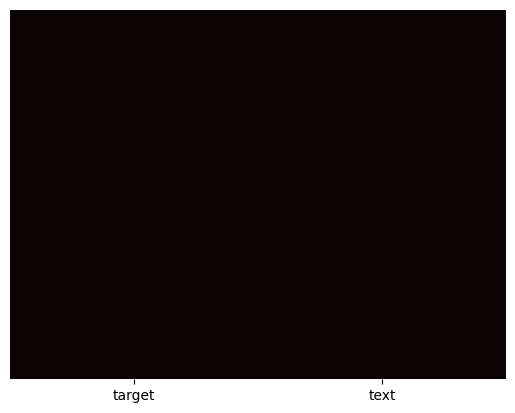

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [ ]:
df.duplicated().sum()

403

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:

df.shape

(5169, 2)

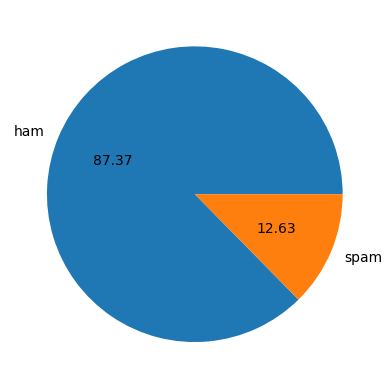

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic imbalanced dataset for demonstration
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.99, 0.01],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

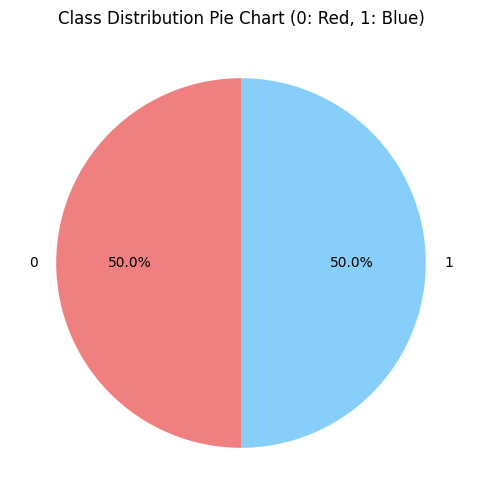

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_resampled is a NumPy array
unique_values, counts = np.unique(y_train, return_counts=True)

# Plotting a pie chart with different colors for 0 and 1
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=unique_values, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Class Distribution Pie Chart (0: Red, 1: Blue)')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

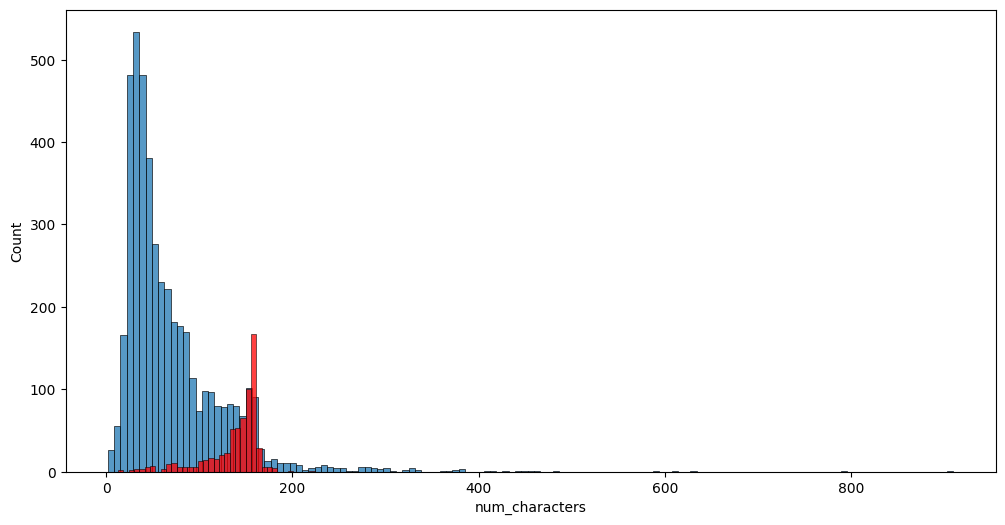

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

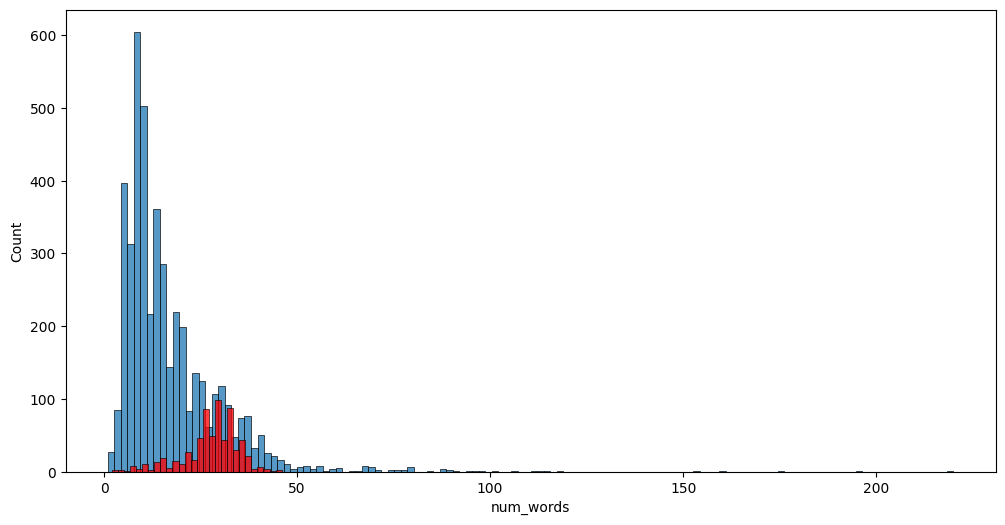

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

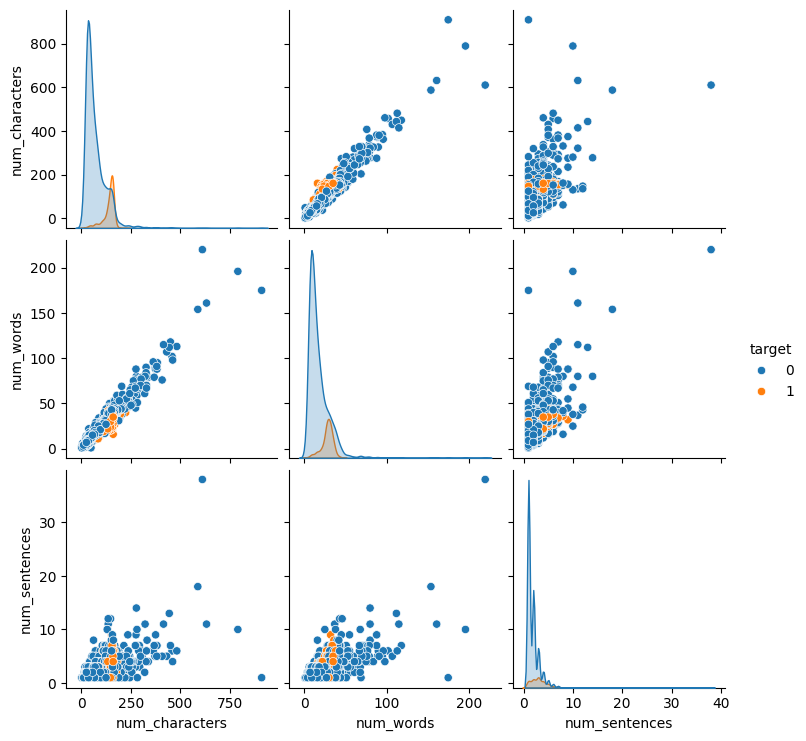

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-42-374ba21c15ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap= "Pastel1", annot=True)


<Axes: >

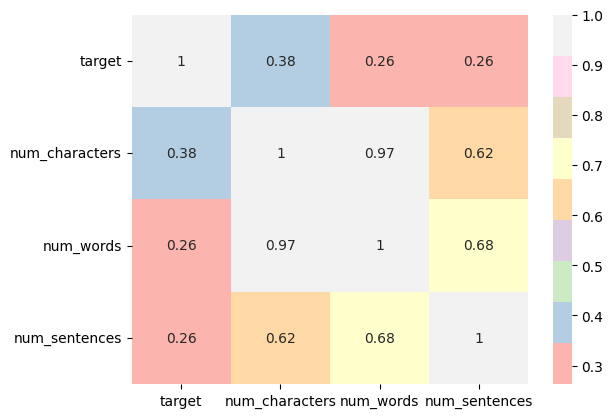

In [ ]:
sns.heatmap(df.corr(), cmap= "Pastel1", annot=True)

# Data preprocessing

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

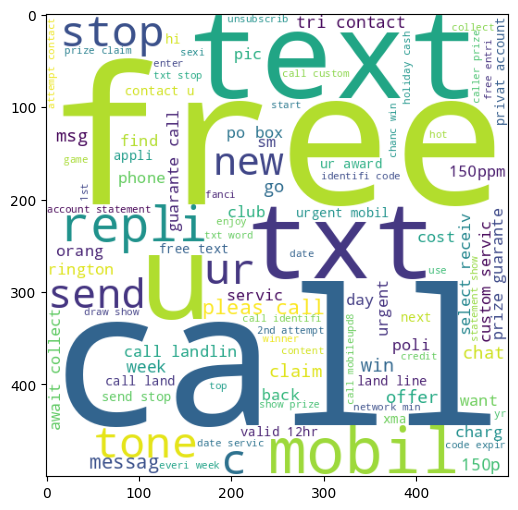

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

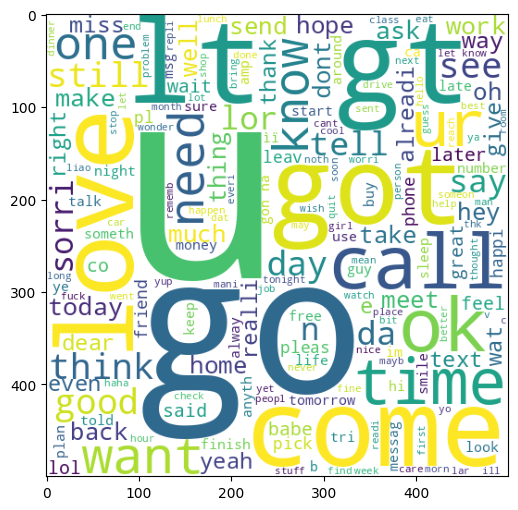

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9939

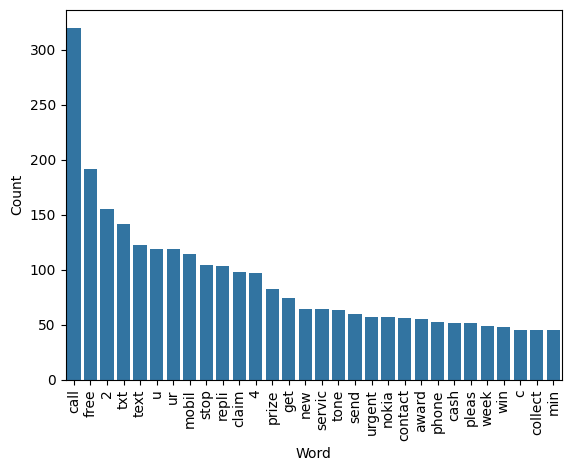

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

word_counts = Counter(spam_corpus)

# Create a DataFrame from the Counter results
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the barplot using seaborn
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

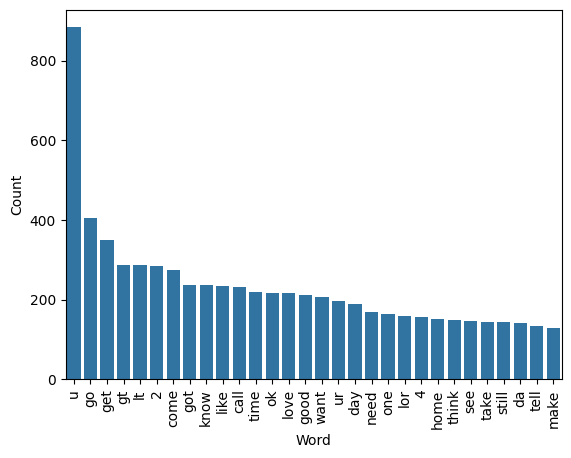

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each word in ham_corpus
word_counts = Counter(ham_corpus)

# Create a DataFrame from the Counter results
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the barplot using seaborn
sns.barplot(x='Word', y='Count', data=df_word_counts)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
print(df['transformed_text'].head())

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: transformed_text, dtype: object


In [ ]:
df['transformed_text'] = df['transformed_text'].str.replace(r'\d+', '')

<ipython-input-62-e8612bc0b2df>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['transformed_text'] = df['transformed_text'].str.replace(r'\d+', '')


In [ ]:
print(df['transformed_text'].head())

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri  wkli comp win fa cup final tkt st ...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: transformed_text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
non_zero_indices = X != 0

for i, (row, col) in enumerate(zip(*non_zero_indices.nonzero())):
    value = X[row, col]
    print(f"Row: {row}, Col: {col}, Value: {value}")

Streaming output truncated to the last 5000 lines.
Row: 4331, Col: 2994, Value: 0.41825564828737105
Row: 4332, Col: 59, Value: 0.6384721886656848
Row: 4332, Col: 1512, Value: 0.518104741387765
Row: 4332, Col: 1802, Value: 0.5691403528585609
Row: 4333, Col: 423, Value: 0.7773656466834579
Row: 4333, Col: 566, Value: 0.37805953554914007
Row: 4333, Col: 799, Value: 0.40237862333426516
Row: 4333, Col: 2729, Value: 0.30143835592107304
Row: 4334, Col: 618, Value: 0.4794629530369184
Row: 4334, Col: 1081, Value: 0.42659249288723816
Row: 4334, Col: 1097, Value: 0.2843928533141884
Row: 4334, Col: 1121, Value: 0.4049227311512761
Row: 4334, Col: 1195, Value: 0.462029005785649
Row: 4334, Col: 2084, Value: 0.36030765502678436
Row: 4335, Col: 755, Value: 0.7168350125899132
Row: 4335, Col: 1178, Value: 0.6972428305298084
Row: 4336, Col: 1152, Value: 1.0
Row: 4337, Col: 595, Value: 0.48794817924793027
Row: 4337, Col: 783, Value: 0.49616355822566655
Row: 4337, Col: 1624, Value: 0.35495965054399387
Row: 4

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)

#     return accuracy

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9690522243713733
Confusion Matrix:
[[896   0]
 [ 32 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.77      0.87       138

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.93      1034
weighted avg       0.97      0.97      0.97      1034



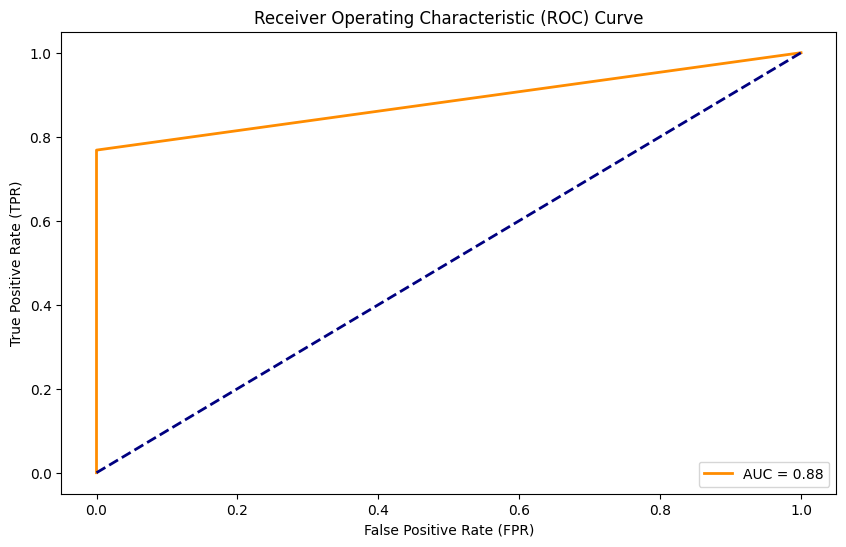

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np

class MultinomialNaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Laplace smoothing parameter
        self.class_probs = None
        self.feature_probs = None
        self.classes = None

    def fit(self, X, y):
        # Calculate class probabilities
        self.classes, class_counts = np.unique(y, return_counts=True)
        self.class_probs = class_counts / len(y)

        # Calculate feature probabilities
        self.feature_probs = {}
        for c in self.classes:
            class_mask = (y == c)
            class_features = X[class_mask]
            total_class_instances = len(class_features)
            feature_probs = (np.sum(class_features, axis=0) + self.alpha) / (total_class_instances + self.alpha * X.shape[1])
            self.feature_probs[c] = feature_probs

    def predict(self, X):
        predictions = [self.predict_instance(xi) for xi in X]
        return np.array(predictions)

    def predict_instance(self, x):
        class_scores = []
        for c in self.classes:
            class_score = np.log(self.class_probs[c])
            class_score += np.sum(np.log(self.feature_probs[c]) * x)
            class_scores.append(class_score)
        return self.classes[np.argmax(class_scores)]

nb_classifier = MultinomialNaiveBayes(alpha=1.0)
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_predi = nb_classifier.predict(X_test)

# Evaluate the performance
accuracy = np.sum(y_predi == y_test) / len(y_test)
conf_matrix = confusion_matrix(y_test, y_predi)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9593810444874274
Confusion Matrix:
[[896   0]
 [ 42  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.77      0.87       138

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.93      1034
weighted avg       0.97      0.97      0.97      1034



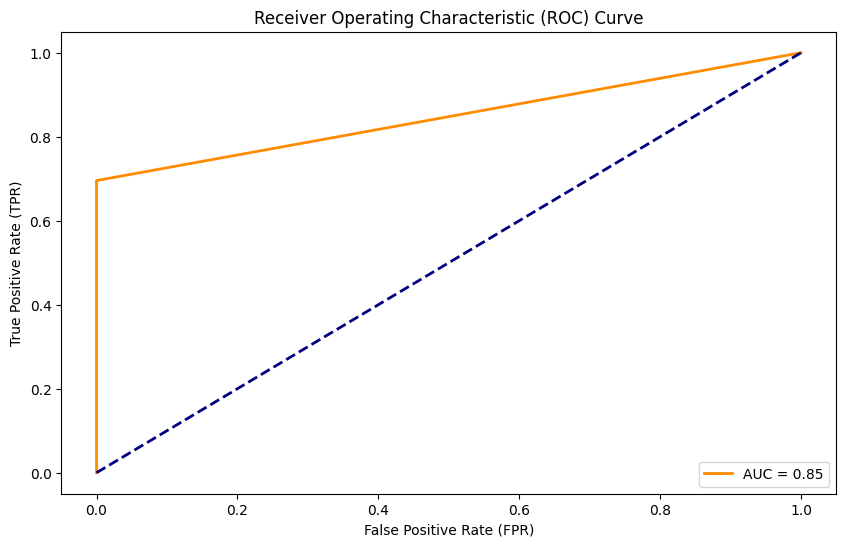

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_predi)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()